In [2]:
from Helpers import *
from LQGController import *

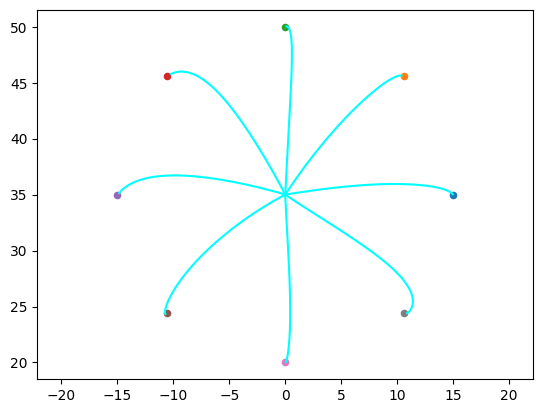

In [3]:
plt.axis("equal")
 
Bdyn = np.array([[0.05,0.025],[0.025,0.05]])
for angles in np.linspace(0,2*pi,9)[:-1] :
    tg = [cos(angles)*15,35+sin(angles)*15]
    #x,y,u,z=BestLQG(Duration=.6,Num_iter=30,w1=1e8,w2 = 1e8,starting_point=[0,40],targets=tg,MultipleLinearization=True,plot = False,Activate_Noise=True)
    #plt.plot(x,y,color = "red")
    x,y,u,z=BestLQG(Duration=.6,Num_iter=60,w1=1e4,w2 = 1e4,w3 = 1,w4 =1,r1 = 1e-5,r2 = 1e-5,starting_point=[0,35],targets=tg,plot = False,Activate_Noise=True,NeglectTorque=True)
    plt.plot(x,y,color = "cyan")
    plt.scatter([tg[0]],[tg[1]],s = 20)
    plt.axis("equal")

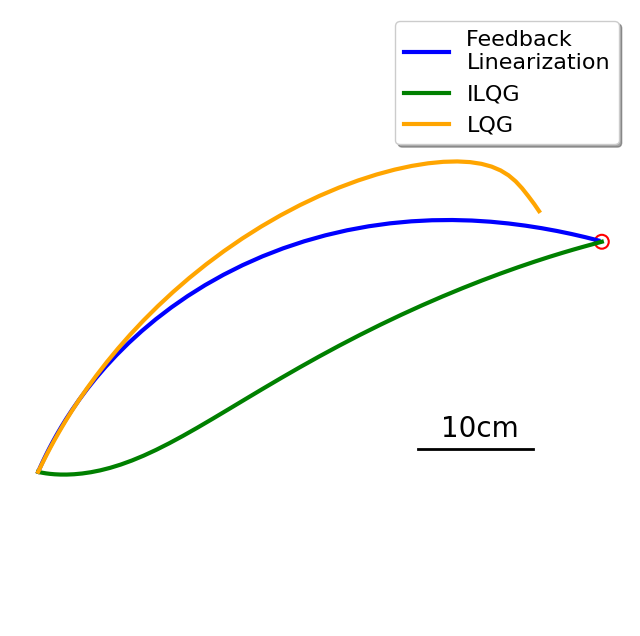

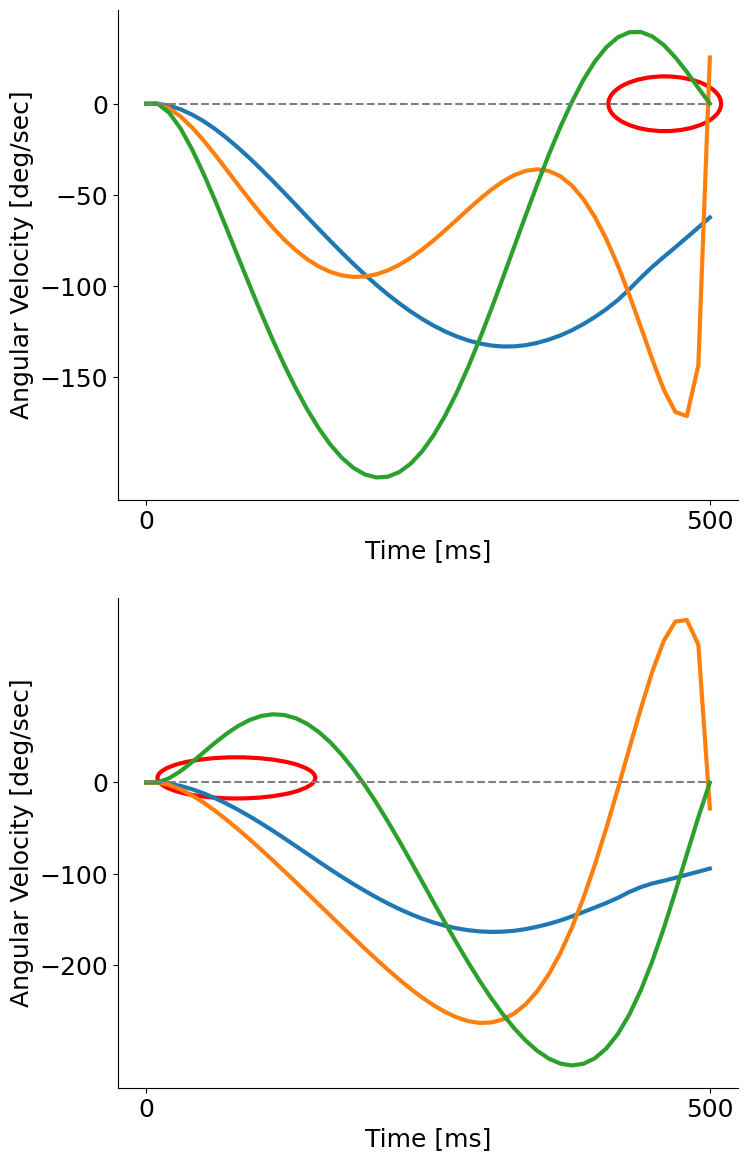

In [11]:
from ILQGController import *
from FLController import *
from LQGController import *
from matplotlib.patches import Ellipse

MovementTime = .5
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e5,w2=1e5,w3=1,w4=1,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=[-23,28],targets=[26,48],ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e5,1,1e-5,[26,48],NumIteration,[-23,28],plot = False,Delay = .06,Noise=True)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=[-23,28],targets=[26,48],plot = False,Delay = .06,Activate_Noise=True)
plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([26],[48],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([10,20],[30,30],color = "black",linewidth = 2)
plt.text(12,31,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(2,figsize = (8,14))

for k in range(2):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
ax[0].plot(Time,xfl[:,2]/pi*180,label="FL",linewidth = 3)
ax[0].plot(Time,z[1]/pi*180,label = "LQG",linewidth = 3)
ax[0].plot(Time,zilqg[:,2]/pi*180,label = "ILQG",linewidth = 3)
ax[0].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
ax[0].set_yticks([0,-50,-100,-150])
ax[0].set_xticks([0,MovementTime*1000])
ax[1].set_xticks([0,MovementTime*1000])
ax[1].set_yticks([0,-100,-200])
ellipse = Ellipse(xy=(460,0), width=100, height=30, edgecolor='red', facecolor='none', linewidth=3)

# Add the ellipse to the plot
ax[0].add_patch(ellipse)



ax[1].plot(Time,xfl[:,3]/pi*180,label="FL",linewidth = 3)
ax[1].plot(Time,z[4]/pi*180,label = "LQG",linewidth = 3)
ax[1].plot(Time,zilqg[:,3]/pi*180,label = "ILQG",linewidth = 3)
ax[1].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
ellipse = Ellipse(xy=(80,5), width=140, height=45, edgecolor='red', facecolor='none', linewidth=3)

# Add the ellipse to the plot
ax[1].add_patch(ellipse)
#MultipleLabel(title = "")
#x,y,u=BestLQG(Duration=.6,Num_iter=120,MultipleLinearization=True)

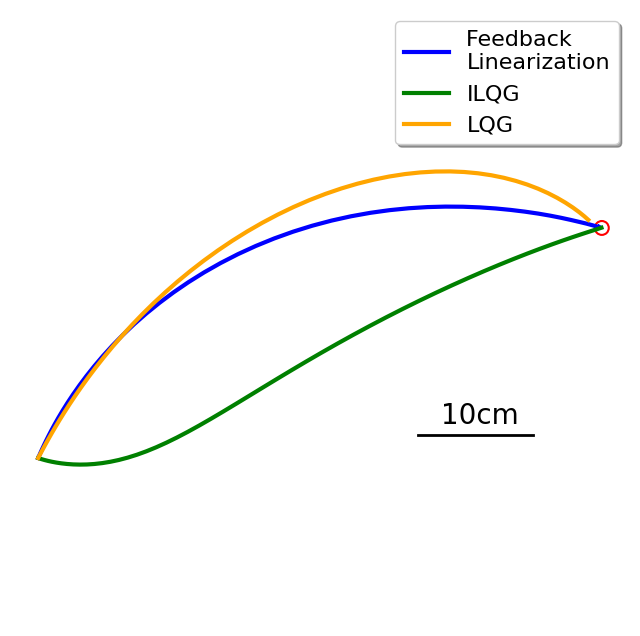

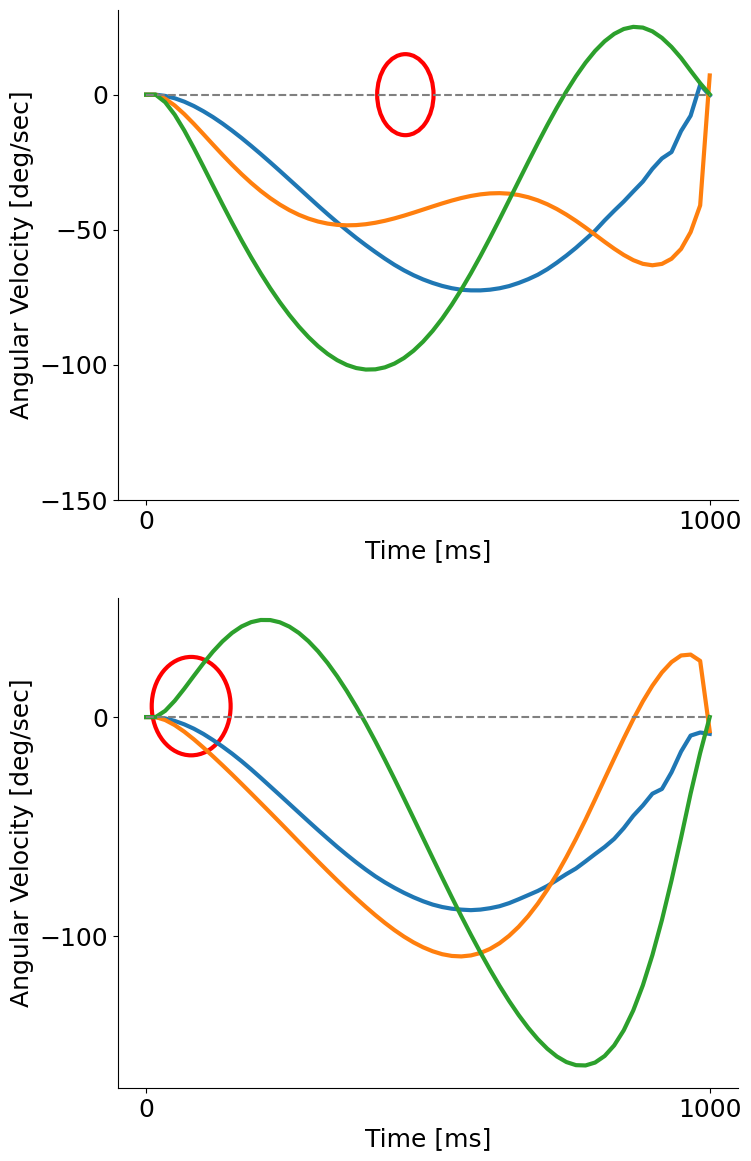

In [13]:
from ILQGController import *
from FLController import *
from matplotlib.patches import Ellipse

MovementTime = 1
NumIteration = int(MovementTime*60)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=[-23,28],targets=[26,48],ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e4,1,1e-5,[26,48],NumIteration,[-23,28],plot = False,Delay = .06,Noise=True)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=[-23,28],targets=[26,48],plot = False,Delay = .06,Activate_Noise=True)
plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([26],[48],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([10,20],[30,30],color = "black",linewidth = 2)
plt.text(12,31,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(2,figsize = (8,14))

for k in range(2):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
ax[0].plot(Time,xfl[:,2]/pi*180,label="FL",linewidth = 3)
ax[0].plot(Time,z[1]/pi*180,label = "LQG",linewidth = 3)
ax[0].plot(Time,zilqg[:,2]/pi*180,label = "ILQG",linewidth = 3)
ax[0].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
ax[0].set_yticks([0,-50,-100,-150])
ax[0].set_xticks([0,MovementTime*1000])
ax[1].set_xticks([0,MovementTime*1000])
ax[1].set_yticks([0,-100,-200])
ellipse = Ellipse(xy=(460,0), width=100, height=30, edgecolor='red', facecolor='none', linewidth=3)

# Add the ellipse to the plot
ax[0].add_patch(ellipse)



ax[1].plot(Time,xfl[:,3]/pi*180,label="FL",linewidth = 3)
ax[1].plot(Time,z[4]/pi*180,label = "LQG",linewidth = 3)
ax[1].plot(Time,zilqg[:,3]/pi*180,label = "ILQG",linewidth = 3)
ax[1].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
ellipse = Ellipse(xy=(80,5), width=140, height=45, edgecolor='red', facecolor='none', linewidth=3)

# Add the ellipse to the plot
ax[1].add_patch(ellipse)

In [ ]:
def Rearrange_state(x):
    return np.array([x[0],x[2],x[4],x[1],x[3],x[5],x[6],x[7]])
def Cost_Function(w1,w2,r,z,u,rearrange = False,targetpenalty = True):
    if len(z) != 8 : raise ValueError 
    if rearrange : z = Rearrange_state(z)
    R = np.array([[r,0],[0,r]])
    Q = np.array([[w1,0,0,0,0,0,-w1,0],[0,w2,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],
               [0,0,0,w1,0,0,0,-w1],[0,0,0,0,w2,0,0,0],[0,0,0,0,0,0,0,0],
               [-w1,0,0,0,0,0,w1,0],[0,0,0,-w1,0,0,0,w1]])
    J = 0
    for i in range(u.shape[0]):
        J+= u[i].T@R@u[i]
    if targetpenalty : J+=z.T@Q@z
    return int(J*1000)/1000
def toPolar(targets):
    obj1,obj2 = newton(fnewton,dfnewton,1e-8,1000,targets[0],targets[1])
    return np.array([obj1,obj2])


In [16]:
from ILQGController import *
from FLController import *
from matplotlib.patches import Ellipse
st = ToCartesian(np.array([70,70])/180*pi)
tg = ToCartesian(np.array([-10,100])/180*pi)
MovementTime = .6
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))

xFL,yFL,jFL,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,uilqg,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = .06,Noise=True)
xLQG,yLQG,ulqg,zlqg=BestLQG(Duration=MovementTime,Num_iter=120,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True)

jILQG = Cost_Function(1e7,1e3,1e-5,np.concatenate((zilqg[-1,:6],toPolar(tg))),uilqg,rearrange=True)
jLQG = Cost_Function(1e7,1e3,1e-5,zlqg[:,-1],ulqg)
jFL = int(jFL*1000)/1000

plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([30],[28],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([-10,0],[30,30],color = "black",linewidth = 2)
plt.text(-8,31,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(1,3,figsize = (10,6))
Decal = 15
ft = 20

ax[0].plot(Time,xfl[:,2]/pi*180,label="Shoulder",linewidth = 3,color = "blue")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[1]/pi*180,label = "Shoulder",linewidth = 3,color = "orange")
ax[2].plot(Time,zilqg[:,2]/pi*180,label = "Shoulder",linewidth = 3,color = "green")



ax[0].text(300,(xfl[:,2]/pi*180)[len(xfl[:,2])//2]+Decal,"S",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[1]/pi*180)[len(zlqg[1])//2]+Decal,"S",color = "orange",fontsize = ft)
ax[2].text(300,(zilqg[:,2]/pi*180)[len(zilqg[:,2])//2]+Decal,"S",color = "green",fontsize = ft)

ax[0].text(300,(xfl[:,3]/pi*180)[len(xfl[:,3])//2]+Decal,"E",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[4]/pi*180)[len(zlqg[4])//2]+Decal,"E",color = "orange",fontsize = ft)
ax[2].text(300,(zilqg[:,3]/pi*180)[len(zilqg[:,3])//2]+Decal,"E",color = "green",fontsize = ft)
ft = 20
ax[0].set_title("FL",fontsize = ft,fontweight = "bold",style = "italic")
ax[1].set_title("LQG",fontsize = ft,fontweight = "bold",style = "italic")
ax[2].set_title("ILQG",fontsize = ft,fontweight = "bold",style = "italic")





ax[0].plot(Time,xfl[:,3]/pi*180,label="Elbow",linewidth = 3,color = "blue",linestyle = "-.")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[4]/pi*180,label = "Elbow",linewidth = 3,color = "orange",linestyle = "-.")
ax[2].plot(Time,zilqg[:,3]/pi*180,label = "Elbow",linewidth = 3,color = "green",linestyle = "-.")
ax[0].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
for k in range(3):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
    ax[k].set_yticks([-200,-100,0,100])
    ax[k].set_ylim(-250,200)
    ax[k].set_xticks([0,MovementTime*1000])

plt.subplots_adjust(wspace=0.4,hspace = 0.3)
#MultipleLabel(title = "")

NameError: name 'Cost_Function' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
from ILQGController import *
from FLController import *
from matplotlib.patches import Ellipse
st = ToCartesian(np.array([80,120])/180*pi)
tg = ToCartesian(np.array([20,60])/180*pi)
MovementTime = .6
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))

xFL,yFL,jFL,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,uilqg,zilqg=ILQG(MovementTime,1e4,1,1e-5,tg,NumIteration,st,plot = False,Delay = .06,Noise=True)
xLQG,yLQG,ulqg,zlqg=BestLQG(Duration=MovementTime,Num_iter=120,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True,MultipleLinearization=False)

jILQG = Cost_Function(1e7,1e3,1e-5,np.concatenate((zilqg[-1,:6],toPolar(tg))),uilqg,rearrange=True)
jLQG = Cost_Function(1e7,1e3,1e-5,zlqg[:,-1],ulqg)
jFL = int(jFL*1000)/1000

plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter(tg[0],tg[1],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([-10,0],[20,20],color = "black",linewidth = 2)
plt.text(-8,21,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(1,3,figsize = (10,6))
Decal = 15
ft = 20

ax[0].plot(Time,xfl[:,2]/pi*180,label="Shoulder",linewidth = 3,color = "blue")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[1]/pi*180,label = "Shoulder",linewidth = 3,color = "orange")
ax[2].plot(Time,zilqg[:,2]/pi*180,label = "Shoulder",linewidth = 3,color = "green")



ax[0].text(300,(xfl[:,2]/pi*180)[len(xfl[:,2])//2]+Decal,"S",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[1]/pi*180)[len(zlqg[1])//2]+Decal*2,"S",color = "orange",fontsize = ft)
ax[2].text(Time[np.argmin(zilqg[:,2])],(zilqg[:,2]/pi*180)[np.argmin(zilqg[:,2])]-2*Decal,"S",color = "green",fontsize = ft)

ax[0].text(300,(xfl[:,3]/pi*180)[len(xfl[:,3])//2]-2.5*Decal,"E",color = "blue",fontsize = ft)
ax[1].text(300,(zlqg[4]/pi*180)[len(zlqg[4])//2]-1.5*Decal,"E",color = "orange",fontsize = ft)
ax[2].text(Time[np.argmin(zilqg[:,3])],(zilqg[:,3]/pi*180)[np.argmin(zilqg[:,3])]-2*Decal,"E",color = "green",fontsize = ft
ft = 20
ax[0].set_title("FL",fontsize = ft,fontweight = "bold",style = "italic")
ax[1].set_title("LQG",fontsize = ft,fontweight = "bold",style = "italic")
ax[2].set_title("ILQG",fontsize = ft,fontweight = "bold",style = "italic")





ax[0].plot(Time,xfl[:,3]/pi*180,label="Elbow",linewidth = 3,color = "blue",linestyle = "-.")
ax[1].plot(np.linspace(0,MovementTime*1000,120),zlqg[4]/pi*180,label = "Elbow",linewidth = 3,color = "orange",linestyle = "-.")
ax[2].plot(Time,zilqg[:,3]/pi*180,label = "Elbow",linewidth = 3,color = "green",linestyle = "-.")
ax[0].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
for k in range(3):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
    ax[k].set_yticks([-200,-100,0,100])
    ax[k].set_ylim(-300,200)
    ax[k].set_xticks([0,MovementTime*1000])

plt.subplots_adjust(wspace=0.4,hspace = 0.3)

In [ ]:
from ILQGController import *
from FLController import *
from matplotlib.patches import Ellipse
st = [-15,50]
tg = [30,28]
MovementTime = 1
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
plt.figure(figsize = (8,8))
xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,Delay = .06,Activate_Noise=True)
xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e7,1e3,1e-5,tg,NumIteration,st,plot = False,Delay = .06,Noise=True)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True)
plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = 3)
plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = 3)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([20,40,60])
plt.xticks([-20,0,20])
plt.scatter([30],[28],edgecolors='red', facecolors='none', s=100, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([-10,0],[30,30],color = "black",linewidth = 2)
plt.text(-8,31,"10cm",fontsize = 20)
MultipleLabel(title="")
plt.show()

fig,ax = plt.subplots(2,figsize = (8,14))

for k in range(2):
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].tick_params(axis='both', labelsize=18)
    ax[k].set_xlabel("Time [ms]",fontsize = 18)
    ax[k].set_ylabel("Angular Velocity [deg/sec]",fontsize = 18)
ax[0].plot(Time,xfl[:,2]/pi*180,label="FL",linewidth = 3)
ax[0].plot(Time,z[1]/pi*180,label = "LQG",linewidth = 3)
ax[0].plot(Time,zilqg[:,2]/pi*180,label = "ILQG",linewidth = 3)
ax[0].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")
ax[0].set_yticks([0,-100,-200])
ax[0].set_xticks([0,MovementTime*1000])
ax[1].set_xticks([0,MovementTime*1000])
ax[1].set_yticks([0,100,200])




ax[1].plot(Time,xfl[:,3]/pi*180,label="FL",linewidth = 3)
ax[1].plot(Time,z[4]/pi*180,label = "LQG",linewidth = 3)
ax[1].plot(Time,zilqg[:,3]/pi*180,label = "ILQG",linewidth = 3)
ax[1].plot(Time,np.zeros(len(Time)),color = "grey",linestyle = "--")

In [ ]:
from ILQGController import *
from FLController import *
for Delay in [0,0.06]:
    for Duration in [1,.4]:
        x,y,j,xfl = Feedback_Linearization(Duration=Duration,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=50,starting_point=[0,30],targets=[0,50],ShowJ=True,Activate_Noise=True,Delay=Delay)
        x,y,u,zilqg=ILQG(Duration,1e7,1e3,1e-5,[0,50],50,[0,30],Noise=True,Delay=Delay)
        print(zilqg.shape)
        x,y,u,z=BestLQG(Duration=Duration,Num_iter=50,starting_point=[0,30],targets=[0,50],Activate_Noise=True,Delay=Delay)
        plt.legend()
        title1 = "Slow Movement(1sec)" if Duration == 1 else "Fast Movement(400ms)"
        title2 = " without delay" if Delay == 0 else " with Delay"
        plt.title(title1+title2)
        plt.show()
    #x,y,u=BestLQG(Duration=.6,Num_iter=120,MultipleLinearization=True)

In [ ]:
from ILQGController import *
from FLController import *

Delay = .06
Error = np.zeros((6,50))
D = np.linspace(0.4,1,50)
for i,Duration in enumerate(D):
        x,y,j,xfl = Feedback_Linearization(Duration=Duration,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=60,starting_point=[0,30],targets=[0,50],ShowJ=True,Activate_Noise=True,Delay=Delay,plot = False)
        Error[0,i] = np.sqrt((x[-1])**2+(y[-1]-50)**2)
        Error[3,i] = np.max(np.abs(x))
        x,y,u,zilqg=ILQG(Duration,1e7,1e3,1e-5,[0,50],60,[0,30],Noise=True,Delay=Delay,plot = False)
        Error[1,i] = np.sqrt((x[-1])**2+(y[-1]-50)**2)
        Error[4,i] = np.max(np.abs(x))
        x,y,u,z=BestLQG(Duration=Duration,Num_iter=60,starting_point=[0,30],targets=[0,50],Activate_Noise=True,Delay=Delay,plot = False)
        Error[2,i] = np.sqrt((x[-1])**2+(y[-1]-50)**2)
        Error[5,i] = np.max(np.abs(x))

LABELS = ["FL","ILQG","LQG"]
for i in range(3):
        plt.scatter(D,Error[i],label = LABELS[i])
plt.legend()
plt.show()

for i in range(3,6):
        plt.scatter(D,Error[i],label = LABELS[i-3])
plt.legend()
plt.show()

In [ ]:
from ILQGController import *
from FLController import *
for Delay in [0,0.06]:
    for Duration in [1,.4]:
        x,y,j,xfl = Feedback_Linearization(Duration=Duration,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=50,starting_point=[0,30],targets=[0,50],ShowJ=True,Activate_Noise=True,Delay=Delay,AdditionalDynamics={"FF":True,"FFonset":35,"Side":"Right"})
        x,y,u,zilqg=ILQG(Duration,1e7,1e3,1e-5,[0,50],50,[0,30],Noise=True,Delay=Delay,FF=True,Side="Right")
        x,y,u,z=BestLQG(Duration=Duration,Num_iter=50,starting_point=[0,30],targets=[0,50],Activate_Noise=True,Delay=Delay,FF=True)
        plt.legend()
        title1 = "Slow Movement(1sec)" if Duration == 1 else "Fast Movement(400ms)"
        title2 = " without delay" if Delay == 0 else " with Delay"
        plt.title(title1+title2)
        plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a simple plot
fig, ax = plt.subplots()

# Plot an arrow going to the right
ax.annotate('', xy=(3, 0), xytext=(1, 0),
            arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle="->", lw=2))

# Add the text above the arrow using LaTeX formatting
ax.text(1.5, 0.1, r'$F_x = k\dot{y}$', fontsize=14, ha='center')

# Set limits and labels to make the plot clear
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# Show the plot
plt.show()

In [ ]:
from ILQGController import *
from FLController import *
from matplotlib.patches import Ellipse
from matplotlib.patches import FancyArrow
st = [0,30]
tg = [0,50]
MovementTime = .5
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
side = "Right"
plt.figure(figsize = (8,8))
lw = [3,2]
ls = ["-","-."]
plt.plot([0,0],[30,30],color = "black",linestyle = "-.",label = "Baseline")
for i,activation in enumerate([True,False]):
    xFL,yFL,j,xfl = Feedback_Linearization(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r1=1e-5,r2=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,ShowJ=True,plot = False,AdditionalDynamics={"FF":activation,"FFonset":30,"Side":side},Delay = .06,Activate_Noise=True)
    xILQG,yILQG,u,zilqg=ILQG(MovementTime,1e7,1e3,1e-5,tg,NumIteration,st,plot = False,Delay = .06,Noise=True,FF=activation,Side=side)
    xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True,FF=activation,Side=side)
    xLQG2,yLQG2,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True,FF=activation,Side=side,MultipleLinearization=True)
    plt.plot(xFL,yFL,color = "blue",label = "Feedback \nLinearization",linewidth = lw[i],linestyle = ls[i])
    plt.plot(xILQG,yILQG,color = "green",label = "ILQG",linewidth = lw[i],linestyle = ls[i])
    plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = lw[i],linestyle = ls[i])
    plt.plot(xLQG2,yLQG2,color = "magenta",label = "Dynamic LQG",linewidth = lw[i],linestyle = ls[i])
    
    if i == 0: MultipleLabel(title="",side="left")
plt.axis("equal")
plt.yticks([30,40,50])
plt.xticks([-10,0,10])
plt.xlim(-15,15)
plt.scatter([tg[0]],[tg[1]],edgecolors='red', facecolors='none', s=150, linewidth=1.5)
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.plot([-10,-10],[35,40],color = "black",linewidth = 2)
plt.text(-13.1,37,"5cm",fontsize = 20)

Y = [35,38,41,44,47]
DY = [2,3,4,3,2]
mycolor = "#87d1eb"
for i in range(5):
    arrow = FancyArrow(x=8, y=Y[i]-1, dx=DY[i], dy=0, width=0.2, edgecolor=mycolor, facecolor=mycolor, linewidth=3)
    ax.add_patch(arrow)
# Add the arrow to the plot



# Add the text above the arrow using LaTeX formatting
ax.text(10,31, r'$F_x = k\dot{y}$', fontsize=25, ha='center',color = mycolor, fontweight='bold')
plt.show()


In [ ]:
st = [0,30]
tg = [0,50]
MovementTime = .4
NumIteration = int(MovementTime*100)
Time = np.linspace(0,MovementTime*1000,NumIteration)
side = "Right"
plt.figure(figsize = (8,8))
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True,FF=True,Side=side)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
xLQG,yLQG,u,z=BestLQG(Duration=MovementTime,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = .06,Activate_Noise=True,FF=False,Side=side)
plt.plot(xLQG,yLQG,color = "orange",label = "LQG",linewidth = 3)
plt.axis("equal")
plt.yticks([30,40,50])
plt.xticks([-10,0,10])
plt.xlim(-15,15)
plt.scatter([tg[0]],[tg[1]],edgecolors='red', facecolors='none', s=150, linewidth=1.5)
ax = plt.gca()